# Python Geospatial Libraries
#### Interactive Jupyter Notebook

This notebook provides an introduction to <b>Python Geospatial Libraries</b>, mainly <b>GeoPandas</b> (including aspects of <b>Pandas</b>), and <b>Shapely</b>. This notebook was created by Becky Vandewalle based off of prior work by Dandong Yin.

## Notebook Outline:
- [Introduction](#intro)
- [Setup](#setup) (run this first!)
    - [Import Data](#import_data)
- [Introducing the Series](#series_intro)
    - [Array-like Behavior](#series_as_array)
    - [Dictionary-like Behavior](#series_as_dict)
- [Introducing the DataFrame](#DataFrame_intro)
    - [From Series to DataFrame](#series_to_DataFrame)
    - [Manipulating a DataFrame](#manip_DataFrame)
- [Selecting Data in a DataFrame](#select_data)
    - [Select by Label](#select_label)
    - [Select by (only) Position](#select_pos)
    - [Select by Condition](#select_cond)
- [Simple Plotting](#simple_plot)
- [Introducing the GeoDataFrame](#geodf_intro)
    - [Hex Values in the Geography Column](#hex_geo)
- [Introducing Shapely](#shapely_intro)
    - [Basic Shapes](#basic_shapes)
    - [Geometric Attributes and Methods](#geom_ops)
- [Exploring Spatial Relationships with Shapely](#spat_relat)
- [Performing Spatial Operations](#spat_ops)

<a id='intro'></a>
## Introduction

<b>Pandas</b> is a Python library for data analysis, featuring easy IO, powerful indexing, database operations, and categorical data support. Two primary data structures in Pandas are <b>`Series`</b> and <b>`DataFrame`</b>.

<b>GeoPandas</b> extends Pandas by adding core geographical functionality. You can do spatial database-like operations with this library.

<b>Shapely</b> is useful for working with vector data using set-like operators.

Useful documentation for these libraries can be found here:

>Pandas https://pandas.pydata.org/pandas-docs/stable/
<br>GeoPandas http://geopandas.org/
<br>Shapely https://shapely.readthedocs.io/en/stable/manual.html

>More information about DataFrames https://pandas.pydata.org/pandas-docs/version/0.22/dsintro.html#DataFrame
<br>Shapely attributes and methods https://shapely.readthedocs.io/en/stable/genindex.html

<a id='setup'></a>
## Setup
Run this cell for the rest of the notebook to work!

In [2]:
# import required libraries

import os
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely
import matplotlib

/cvmfs/iguide.purdue.edu/software/conda/iguide/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.11.2-CAPI-1.17.2). Conversions between both will be slow.
  warnings.warn(


In [3]:
%matplotlib inline

<a id='import_data'></a>
### Import Data
The main dataset used in this notebook is stored as a dBase database file (.dbf). Pandas can not import a dBase file directly, so Geopandas is used to convert it to a format Pandas can read.

In [4]:
# import towns database

towns_temp_gpd = gpd.read_file(os.path.join('./data','towns.dbf'))
towns_table = pd.DataFrame(towns_temp_gpd)[:10]


countries = gpd.read_file('data/ne_10m_admin_0_countries.shp')
cities = gpd.read_file('data/ne_10m_populated_places.shp')
rivers = gpd.read_file('data/ne_10m_rivers_lake_centerlines.shp')

# check type

type(towns_table)

pandas.core.frame.DataFrame

Lets check to make sure the data were properly loaded by looking at the first few rows containing town information (more on the `head` and `tail` functions later).

In [8]:
# show initial values of data frame

towns_table.head()

,TOWN_ID,TOWN,FIPS_STCO,CCD_MCD,FIPS_PLACE,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,FOURCOLOR,TYPE,POP2010,POPCH00_10,SHAPE_AREA,SHAPE_LEN,geometry
0,195,MOUNT WASHINGTON,25003,080,43300,100,135,130,35,-5,1,T,167,37,5.797118e+07,31638.316048,"POLYGON ((36115.894 880179.251, 36980.214 8796..."
1,325,WEST SPRINGFIELD,25013,110,76030,26965,27537,27899,572,362,2,TC,28391,492,4.531454e+07,34458.401293,"POLYGON ((106810.684 879681.441, 106814.824 87..."
2,122,HANOVER,25023,040,28285,11403,11912,13164,509,1252,1,T,13879,715,4.059553e+07,29602.365447,"POLYGON ((250886.704 878325.941, 251695.934 87..."
3,18,AVON,25021,005,02935,4843,4558,4443,-285,-115,4,T,4356,-87,1.174804e+07,14941.830951,"POLYGON ((238434.144 876232.691, 239075.264 87..."
4,112,GRANVILLE,25013,035,26675,1298,1403,1521,105,118,4,T,1566,45,1.115403e+08,43612.600436,"POLYGON ((77501.874 877293.751, 83945.044 8759..."


We will return to the towns database later. For now, lets start by exploring a `Series`.

<a id='series_intro'></a>
## Introducing the Series

A `Series` in Pandas is a <b>one-dimensional labeled array</b> capable of holding a wide variety of data. This array also has an <b>index</b>, which is like a label for each of the values in the array. The basic method to create a `Series` is to call:

> pd.Series(data, index=index)

Here, data can be many different things, such as:

- a Python dictionary
- a numpy array
- a scalar value (like `5`)

Anything like an array, iterable, a dictionary, or a scalar value, will work for data contents!

Basically, a `Series` is a list with an index!

Here are some examples of constructing a <b>`Series`</b>:

In [14]:
# create a basic series

pd.Series([2,4,5])

0    2
1    4
2    5
dtype: int64

In [13]:
# create a basic series with an index

pd.Series([0,1,2], index=['a', 'b', 'c'])

a    0
b    1
c    2
dtype: int64

Note that index values are on the left.

In [11]:
# create a series using a dictionary of values and index values

pd.Series({'x' : 0, 'y' : 1, 'z' : 2})

x    0
y    1
z    2
dtype: int64

In [15]:
# scalar values will be repeated to be the length of the index

pd.Series(5, index=['a', 'b', 'c'])

a    5
b    5
c    5
dtype: int64

In [18]:
# but the opposite does not work
# this cell will fail to run!

#uncomment this next line to see the error
#pd.Series([5, 5, 5], index=['a'])

In [17]:
# if no index is provided, data values will be used as an index

pd.Series([0,1,2])

0    0
1    1
2    2
dtype: int64

Once you have a series object you can access the <b>data</b> and <b>index values</b> directly:

In [19]:
# see type of series

myseries = pd.Series({'a' : 0, 'b' : 1, 'c' : 2})
type(myseries)

pandas.core.series.Series

In [20]:
# list series values

list(myseries.values)

[0, 1, 2]

In [21]:
# list series index values

list(myseries.index)

['a', 'b', 'c']

<a id='series_as_array'></a>
### Array-like Behavior

You can access elements of a <b>`Series`</b> using the `index` operator, just like for regular lists and tuples in Python. Remember that Python indices start with 0.

Here are a few examples:

In [22]:
# return the first element

myseries[0]

0

In [23]:
# select everything up until element index 2 (the third element)

myseries[:2]

a    0
b    1
dtype: int64

In [24]:
# find the median value

myseries.median()

1.0

Operations can be performed element-wise for the `series`.

In [25]:
# see which elements are greater than the medium

myseries > myseries.median()

a    False
b    False
c     True
dtype: bool

Use `any` or `all` to check if a comparison is true for the series as a whole.

In [26]:
# are any elements greater than the medium value?

any(myseries > myseries.median())

True

In [27]:
# are all elements greater than the medium value?

all(myseries > myseries.median())

False

You can also select values using a logical index series.

In [28]:
# select by greater than median

myseries[myseries > myseries.median()]

c    2
dtype: int64

In [29]:
myseries

a    0
b    1
c    2
dtype: int64

You can also pass a list of indices to select series elements out of order.

In [30]:
# select by list of indices

myseries[[2, 1, 1]]

c    2
b    1
b    1
dtype: int64

Other operations are performed element-wise too. For example:

In [31]:
# add series values to self

myseries + myseries

a    0
b    2
c    4
dtype: int64

In [32]:
# raise to the 3rd power

myseries ** 3

a    0
b    1
c    8
dtype: int64

<a id='series_as_dict'></a>
### Dictionary-like Behavior

Since a <b>`Series`</b> has an `index`, you can also work with a `Series` as if it were a Python dictionary:

In [33]:
# find value with index 'a'

myseries['a']

0

In [34]:
# set value of 'd'

myseries['d'] = 5
myseries

a    0
b    1
c    2
d    5
dtype: int64

In [35]:
# see if index value in series

'f' in myseries

False

In [36]:
# see if index value in series

'c' in myseries

True

<b>'Naming' a series</b>

A `Series` has an optional <b>`name`</b> parameter:

In [37]:
# see current name (not assigned)

print (myseries.name)

None


If you name a `Series`, the name will show up in the information at the bottom:

In [38]:
# set name

myseries.rename('stock_price')

a    0
b    1
c    2
d    5
Name: stock_price, dtype: int64

<a id='DataFrame_intro'></a>
## Introducing the DataFrame

What happens when a `Series` gains a dimension? It becomes a <b>`DataFrame`</b>!

We can use the `towns` database we imported at the beginning of this Notebook to see how to check out a `DataFrame`. The `head` function is useful to see the first few rows of a `DataFrame`.

In [5]:
# see start of DataFrame

towns_table.head()

,TOWN_ID,TOWN,FIPS_STCO,CCD_MCD,FIPS_PLACE,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,FOURCOLOR,TYPE,POP2010,POPCH00_10,SHAPE_AREA,SHAPE_LEN,geometry
0,195,MOUNT WASHINGTON,25003,080,43300,100,135,130,35,-5,1,T,167,37,5.797118e+07,31638.316048,"POLYGON ((36115.894 880179.251, 36980.214 8796..."
1,325,WEST SPRINGFIELD,25013,110,76030,26965,27537,27899,572,362,2,TC,28391,492,4.531454e+07,34458.401293,"POLYGON ((106810.684 879681.441, 106814.824 87..."
2,122,HANOVER,25023,040,28285,11403,11912,13164,509,1252,1,T,13879,715,4.059553e+07,29602.365447,"POLYGON ((250886.704 878325.941, 251695.934 87..."
3,18,AVON,25021,005,02935,4843,4558,4443,-285,-115,4,T,4356,-87,1.174804e+07,14941.830951,"POLYGON ((238434.144 876232.691, 239075.264 87..."
4,112,GRANVILLE,25013,035,26675,1298,1403,1521,105,118,4,T,1566,45,1.115403e+08,43612.600436,"POLYGON ((77501.874 877293.751, 83945.044 8759..."


Similarly, the `tail` function can be used to check the end:

In [40]:
# see end of DataFrame

towns_table.tail()

,TOWN_ID,TOWN,FIPS_STCO,CCD_MCD,FIPS_PLACE,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,FOURCOLOR,TYPE,POP2010,POPCH00_10,SHAPE_AREA,SHAPE_LEN,geometry
5,231,PEMBROKE,25023,095,52630,13882,14544,16927,662,2383,4,T,17837,910,6.100425e+07,42214.822703,"POLYGON ((259776.144 874290.371, 259957.504 87..."
6,304,UXBRIDGE,25027,260,71620,8621,10415,11156,1794,741,2,T,13457,2301,7.766001e+07,39595.624547,"POLYGON ((192331.674 873780.751, 192392.504 86..."
7,5,AGAWAM,25013,005,00800,26754,27323,28144,569,821,4,TC,28438,294,6.319876e+07,38160.729223,"POLYGON ((109952.354 871999.621, 110162.394 87..."
8,120,HAMPDEN,25013,040,28075,4665,4709,5171,44,462,4,T,5139,-32,5.099855e+07,29454.532879,"POLYGON ((127256.784 872905.191, 127635.434 86..."
9,88,EASTON,25005,030,20100,17719,19807,22299,2088,2492,4,T,23112,813,7.571470e+07,36051.552667,"POLYGON ((234696.174 871764.311, 235620.094 86..."


Like a `Series`, a `DataFrame` has an <b>index</b>. This one is a numeric range.

In [41]:
# see index

towns_table.index

RangeIndex(start=0, stop=10, step=1)

You can also list the `DataFrame` <b>column names</b>:

In [42]:
# see column names

towns_table.columns

Index(['TOWN_ID', 'TOWN', 'FIPS_STCO', 'CCD_MCD', 'FIPS_PLACE', 'POP1980',
       'POP1990', 'POP2000', 'POPCH80_90', 'POPCH90_00', 'FOURCOLOR', 'TYPE',
       'POP2010', 'POPCH00_10', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry'],
      dtype='object')

And it is often useful to dig into its <b>values</b>:

In [43]:
# see values

towns_table.values

array([[195, 'MOUNT WASHINGTON', 25003, '080', '43300', 100, 135, 130,
        35, -5, 1, 'T', 167, 37, 57971179.2348, 31638.3160483,
       [325, 'WEST SPRINGFIELD', 25013, '110', '76030', 26965, 27537,
        27899, 572, 362, 2, 'TC', 28391, 492, 45314535.7868,
        34458.4012926,
       [122, 'HANOVER', 25023, '040', '28285', 11403, 11912, 13164, 509,
        1252, 1, 'T', 13879, 715, 40595530.4619, 29602.3654467,
       [18, 'AVON', 25021, '005', '02935', 4843, 4558, 4443, -285, -115,
        4, 'T', 4356, -87, 11748038.1104, 14941.8309508,
       [112, 'GRANVILLE', 25013, '035', '26675', 1298, 1403, 1521, 105,
        118, 4, 'T', 1566, 45, 111540272.728, 43612.6004363,
       [231, 'PEMBROKE', 25023, '095', '52630', 13882, 14544, 16927, 662,
        2383, 4, 'T', 17837, 910, 61004248.7947, 42214.8227033,
       [304, 'UXBRIDGE', 25027, '260', '71620', 8621, 10415, 11156, 1794,
        741, 2, 'T', 13457, 2301, 77660011.8388, 39595.6245467,
       [5, 'AGAWAM', 25013, '005', '

It can be useful to double check the size of the values array. We know from the `index` that there are 351 rows, and now we can see there are 17 columns (by a few different methods).

In [44]:
# see the size of the values array

towns_table.values.shape

(10, 17)

In [45]:
# count columns

print (len(towns_table.values[0]))
print (len(towns_table.columns))

17
17


Using index selection we can see all values in one row.

In [46]:
# see one row

towns_table.values[5]

array([231, 'PEMBROKE', 25023, '095', '52630', 13882, 14544, 16927, 662,
       2383, 4, 'T', 17837, 910, 61004248.7947, 42214.8227033,
      dtype=object)

We can use the double index method to find a value within a particular and row and column:

In [47]:
# find specific value

towns_table.values[5][5]

13882

Sometimes it is useful to know summary information about a `DataFrame`. The `describe` makes this clear:

In [48]:
# summarize DataFrame

towns_table.describe()

,TOWN_ID,FIPS_STCO,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,FOURCOLOR,POP2010,POPCH00_10,SHAPE_AREA,SHAPE_LEN
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.000000
mean,152.000000,25015.400000,11625.000000,12234.300000,13085.400000,609.300000,851.100000,3.000000,13634.200000,548.800000,5.957458e+07,33973.077619
std,109.700603,7.933053,9714.914673,10039.928984,10480.075267,768.070895,931.386595,1.333333,10696.622175,716.749422,2.631064e+07,8311.382105
min,5.000000,25003.000000,100.000000,135.000000,130.000000,-285.000000,-115.000000,1.000000,167.000000,-87.000000,1.174804e+07,14941.830951
25%,94.000000,25013.000000,4709.500000,4595.750000,4625.000000,59.250000,179.000000,2.000000,4551.750000,39.000000,4.673554e+07,30111.353097
50%,121.000000,25013.000000,10012.000000,11163.500000,12160.000000,539.000000,601.500000,4.000000,13668.000000,393.000000,5.948771e+07,35254.976980
75%,222.000000,25022.500000,16759.750000,18491.250000,20956.000000,639.500000,1144.250000,4.000000,21793.250000,788.500000,7.258571e+07,39236.900716
max,325.000000,25027.000000,26965.000000,27537.000000,28144.000000,2088.000000,2492.000000,4.000000,28438.000000,2301.000000,1.115403e+08,43612.600436


Transposing a `DataFrame` can also come in handy:

In [49]:
# transpose DataFrame

towns_table.T

,0,1,2,3,4,5,6,7,8,9
TOWN_ID,195,325,122,18,112,231,304,5,120,88
TOWN,MOUNT WASHINGTON,WEST SPRINGFIELD,HANOVER,AVON,GRANVILLE,PEMBROKE,UXBRIDGE,AGAWAM,HAMPDEN,EASTON
FIPS_STCO,25003,25013,25023,25021,25013,25023,25027,25013,25013,25005
CCD_MCD,080,110,040,005,035,095,260,005,040,030
FIPS_PLACE,43300,76030,28285,02935,26675,52630,71620,00800,28075,20100
POP1980,100,26965,11403,4843,1298,13882,8621,26754,4665,17719
POP1990,135,27537,11912,4558,1403,14544,10415,27323,4709,19807
POP2000,130,27899,13164,4443,1521,16927,11156,28144,5171,22299
POPCH80_90,35,572,509,-285,105,662,1794,569,44,2088
POPCH90_00,-5,362,1252,-115,118,2383,741,821,462,2492


It is also possible to <b>sort</b> a `DataFrame` by values in a particular column:

In [50]:
# sort DataFrame by column

towns_table.sort_values(by='POP2010')

,TOWN_ID,TOWN,FIPS_STCO,CCD_MCD,FIPS_PLACE,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,FOURCOLOR,TYPE,POP2010,POPCH00_10,SHAPE_AREA,SHAPE_LEN,geometry
0,195,MOUNT WASHINGTON,25003,080,43300,100,135,130,35,-5,1,T,167,37,5.797118e+07,31638.316048,"POLYGON ((36115.894 880179.251, 36980.214 8796..."
4,112,GRANVILLE,25013,035,26675,1298,1403,1521,105,118,4,T,1566,45,1.115403e+08,43612.600436,"POLYGON ((77501.874 877293.751, 83945.044 8759..."
3,18,AVON,25021,005,02935,4843,4558,4443,-285,-115,4,T,4356,-87,1.174804e+07,14941.830951,"POLYGON ((238434.144 876232.691, 239075.264 87..."
8,120,HAMPDEN,25013,040,28075,4665,4709,5171,44,462,4,T,5139,-32,5.099855e+07,29454.532879,"POLYGON ((127256.784 872905.191, 127635.434 86..."
6,304,UXBRIDGE,25027,260,71620,8621,10415,11156,1794,741,2,T,13457,2301,7.766001e+07,39595.624547,"POLYGON ((192331.674 873780.751, 192392.504 86..."
2,122,HANOVER,25023,040,28285,11403,11912,13164,509,1252,1,T,13879,715,4.059553e+07,29602.365447,"POLYGON ((250886.704 878325.941, 251695.934 87..."
5,231,PEMBROKE,25023,095,52630,13882,14544,16927,662,2383,4,T,17837,910,6.100425e+07,42214.822703,"POLYGON ((259776.144 874290.371, 259957.504 87..."
9,88,EASTON,25005,030,20100,17719,19807,22299,2088,2492,4,T,23112,813,7.571470e+07,36051.552667,"POLYGON ((234696.174 871764.311, 235620.094 86..."
1,325,WEST SPRINGFIELD,25013,110,76030,26965,27537,27899,572,362,2,TC,28391,492,4.531454e+07,34458.401293,"POLYGON ((106810.684 879681.441, 106814.824 87..."
7,5,AGAWAM,25013,005,00800,26754,27323,28144,569,821,4,TC,28438,294,6.319876e+07,38160.729223,"POLYGON ((109952.354 871999.621, 110162.394 87..."


<a id='series_to_DataFrame'></a>
### From Series to DataFrame

Now that we are slightly more familiar with the `DataFrame`, we can go into more detail. Technically, a `DataFrame` is implemented as a list of named `Series` all <b>with the same index values<b>.

In [17]:
# construct a DataFrame

myDataFrame = pd.DataFrame(
    {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])})

myDataFrame

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


Remember the `name` attribute for a `Series`? Since each column in a `DataFrame` is a `Series`, each column name is equivalent to the name of the `Series` for that column.

In [18]:
# show DataFrame column names

myDataFrame.columns

Index(['one', 'two'], dtype='object')

<a id='manip_DataFrame'></a>
### Manipulating a DataFrame

Columns in a `DataFrame` can be freely selected, added, deleted (as with the "dictionary" aspect of `Series`):

In [19]:
# create new column from existing columns

myDataFrame['three'] = myDataFrame['one'] + myDataFrame['two']
myDataFrame

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


Columns in a `DataFrame` do not have to all be the same data type (as we saw with the towns database):

In [20]:
# create new column from comparison

myDataFrame['flag'] = myDataFrame['one'] > 2
myDataFrame

,one,two,three,flag
a,1.0,1.0,2.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,6.0,True
d,NaN,4.0,NaN,False


It is simple to <b>delete</b> a column:

In [21]:
# delete column

del myDataFrame['two']
myDataFrame

,one,three,flag
a,1.0,2.0,False
b,2.0,4.0,False
c,3.0,6.0,True
d,NaN,NaN,False


Scalar values assigned to a column repeat to fit the length of the `DataFrame`.

In [22]:
# add column

myDataFrame['four'] = 4
myDataFrame

,one,three,flag,four
a,1.0,2.0,False,4
b,2.0,4.0,False,4
c,3.0,6.0,True,4
d,NaN,NaN,False,4


You can also add a new row to the `DataFrame` using the pandas `concat` function. The extra code `to_frame().T` transposes the series to add the data row-wise.

In [23]:
# add row to DataFrame

pd.concat([myDataFrame, pd.Series({'one':3,'three':2.0,'flag':False}).to_frame().T])

,one,three,flag,four
a,1.0,2.0,False,4.0
b,2.0,4.0,False,4.0
c,3.0,6.0,True,4.0
d,NaN,NaN,False,4.0
0,3,2.0,False,NaN


Note that the changes won't affect the original `DataFrame` unless you re-assign it.

In [25]:
myDataFrame

,one,three,flag,four
a,1.0,2.0,False,4
b,2.0,4.0,False,4
c,3.0,6.0,True,4
d,NaN,NaN,False,4


In [26]:
# add row to DataFrame

myDataFrame2 = pd.concat([myDataFrame, pd.Series({'one':3,'three':2.0,'flag':False}).to_frame().T])

In [27]:
myDataFrame2

,one,three,flag,four
a,1.0,2.0,False,4.0
b,2.0,4.0,False,4.0
c,3.0,6.0,True,4.0
d,NaN,NaN,False,4.0
0,3,2.0,False,NaN


Generally speaking, it's better way to include all rows you think you will need while creating the DataFrame.

You can also <b>drop</b> rows and columns:

In [28]:
# drop rows

myDataFrame.drop(['a','c'])

,one,three,flag,four
b,2.0,4.0,False,4
d,NaN,NaN,False,4


`axis` specifies whether you are referring to rows or columns:

In [29]:
# drop columns

myDataFrame.drop(['one','four'], axis=1)

,three,flag
a,2.0,False
b,4.0,False
c,6.0,True
d,NaN,False


<a id='select_data'></a>
## Selecting Data in a DataFrame

<b>Selecting data</b> is a common task when dealing with a `DataFrames`.

<a id='select_label'></a>
### Select by Label

As seen before, we can select data using `label` values.

In [31]:
# select column by index

towns_table['POP2010']

0      167
1    28391
2    13879
3     4356
4     1566
5    17837
6    13457
7    28438
8     5139
9    23112
Name: POP2010, dtype: int64

We can select just a few rows with index slicing:

In [32]:
# select rows

towns_table[0:3]

,TOWN_ID,TOWN,FIPS_STCO,CCD_MCD,FIPS_PLACE,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,FOURCOLOR,TYPE,POP2010,POPCH00_10,SHAPE_AREA,SHAPE_LEN,geometry
0,195,MOUNT WASHINGTON,25003,080,43300,100,135,130,35,-5,1,T,167,37,5.797118e+07,31638.316048,"POLYGON ((36115.894 880179.251, 36980.214 8796..."
1,325,WEST SPRINGFIELD,25013,110,76030,26965,27537,27899,572,362,2,TC,28391,492,4.531454e+07,34458.401293,"POLYGON ((106810.684 879681.441, 106814.824 87..."
2,122,HANOVER,25023,040,28285,11403,11912,13164,509,1252,1,T,13879,715,4.059553e+07,29602.365447,"POLYGON ((250886.704 878325.941, 251695.934 87..."


We can combine row selection using indices and selecting columns using labels using the <b>`loc`</b> function:

In [33]:
# select rows and columns

towns_table.loc[0:2,['POP2010','TOWN']]

,POP2010,TOWN
0,167,MOUNT WASHINGTON
1,28391,WEST SPRINGFIELD
2,13879,HANOVER


In [34]:
# select row and columns

towns_table.loc[3,['POP2010','TOWN','POP1990']] 

POP2010    4356
TOWN       AVON
POP1990    4558
Name: 3, dtype: object

In [35]:
# select specific value

towns_table.loc[3,'POP2010']

4356

<a id='select_pos'></a>
### Select by (only) Position

Column label values are not necessary - you can select values using just indices with the <b>`iloc`</b> function. Here are some examples:

In [36]:
# select row

towns_table.iloc[3]

TOWN_ID                                                      18
TOWN                                                       AVON
FIPS_STCO                                                 25021
CCD_MCD                                                     005
FIPS_PLACE                                                02935
POP1980                                                    4843
POP1990                                                    4558
POP2000                                                    4443
POPCH80_90                                                 -285
POPCH90_00                                                 -115
FOURCOLOR                                                     4
TYPE                                                          T
POP2010                                                    4356
POPCH00_10                                                  -87
SHAPE_AREA                                        11748038.1104
SHAPE_LEN                               

In [37]:
# select some columns from row

towns_table.iloc[3,0:5]

TOWN_ID          18
TOWN           AVON
FIPS_STCO     25021
CCD_MCD         005
FIPS_PLACE    02935
Name: 3, dtype: object

In [38]:
# select some columns from all rows

towns_table.iloc[:,0:5]

,TOWN_ID,TOWN,FIPS_STCO,CCD_MCD,FIPS_PLACE
0,195,MOUNT WASHINGTON,25003,080,43300
1,325,WEST SPRINGFIELD,25013,110,76030
2,122,HANOVER,25023,040,28285
3,18,AVON,25021,005,02935
4,112,GRANVILLE,25013,035,26675
5,231,PEMBROKE,25023,095,52630
6,304,UXBRIDGE,25027,260,71620
7,5,AGAWAM,25013,005,00800
8,120,HAMPDEN,25013,040,28075
9,88,EASTON,25005,030,20100


In [39]:
# select rows and columns

towns_table.iloc[:2,:2]

,TOWN_ID,TOWN
0,195,MOUNT WASHINGTON
1,325,WEST SPRINGFIELD


<a id='select_cond'></a>
### Select by Condition

We can use conditional operators to select `DataFrame` slices that meet specific conditions. Here are examples:

In [40]:
# select by condition

towns_table['POP2010']>16000

0    False
1     True
2    False
3    False
4    False
5     True
6    False
7     True
8    False
9     True
Name: POP2010, dtype: bool

In [41]:
# select by pop difference

(towns_table['POP2010']-towns_table['POP1990'])>100

0    False
1     True
2     True
3    False
4     True
5     True
6     True
7     True
8     True
9     True
dtype: bool

In [42]:
# select by condition and pop difference

(towns_table['POP2010']>16000) & ((towns_table['POP2010']-towns_table['POP1990'])>100)

0    False
1     True
2    False
3    False
4    False
5     True
6    False
7     True
8    False
9     True
dtype: bool

In [43]:
# select by condition or pop difference

(towns_table['POP2010']>16000) | ((towns_table['POP2010']-towns_table['POP1990'])>100)

0    False
1     True
2     True
3    False
4     True
5     True
6     True
7     True
8     True
9     True
dtype: bool

In [44]:
# select values by condition

towns_table[towns_table['POP2010']>16000]

,TOWN_ID,TOWN,FIPS_STCO,CCD_MCD,FIPS_PLACE,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,FOURCOLOR,TYPE,POP2010,POPCH00_10,SHAPE_AREA,SHAPE_LEN,geometry
1,325,WEST SPRINGFIELD,25013,110,76030,26965,27537,27899,572,362,2,TC,28391,492,4.531454e+07,34458.401293,"POLYGON ((106810.684 879681.441, 106814.824 87..."
5,231,PEMBROKE,25023,095,52630,13882,14544,16927,662,2383,4,T,17837,910,6.100425e+07,42214.822703,"POLYGON ((259776.144 874290.371, 259957.504 87..."
7,5,AGAWAM,25013,005,00800,26754,27323,28144,569,821,4,TC,28438,294,6.319876e+07,38160.729223,"POLYGON ((109952.354 871999.621, 110162.394 87..."
9,88,EASTON,25005,030,20100,17719,19807,22299,2088,2492,4,T,23112,813,7.571470e+07,36051.552667,"POLYGON ((234696.174 871764.311, 235620.094 86..."


In [45]:
# select values by pop difference

towns_table[towns_table['POP1990']-towns_table['POP1980']<100]

,TOWN_ID,TOWN,FIPS_STCO,CCD_MCD,FIPS_PLACE,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,FOURCOLOR,TYPE,POP2010,POPCH00_10,SHAPE_AREA,SHAPE_LEN,geometry
0,195,MOUNT WASHINGTON,25003,080,43300,100,135,130,35,-5,1,T,167,37,5.797118e+07,31638.316048,"POLYGON ((36115.894 880179.251, 36980.214 8796..."
3,18,AVON,25021,005,02935,4843,4558,4443,-285,-115,4,T,4356,-87,1.174804e+07,14941.830951,"POLYGON ((238434.144 876232.691, 239075.264 87..."
8,120,HAMPDEN,25013,040,28075,4665,4709,5171,44,462,4,T,5139,-32,5.099855e+07,29454.532879,"POLYGON ((127256.784 872905.191, 127635.434 86..."


In [46]:
# select values by pop difference and condition

towns_table[((towns_table['POP2010']-towns_table['POP1990'])>100) & (towns_table['POP2010']>16000)]

,TOWN_ID,TOWN,FIPS_STCO,CCD_MCD,FIPS_PLACE,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,FOURCOLOR,TYPE,POP2010,POPCH00_10,SHAPE_AREA,SHAPE_LEN,geometry
1,325,WEST SPRINGFIELD,25013,110,76030,26965,27537,27899,572,362,2,TC,28391,492,4.531454e+07,34458.401293,"POLYGON ((106810.684 879681.441, 106814.824 87..."
5,231,PEMBROKE,25023,095,52630,13882,14544,16927,662,2383,4,T,17837,910,6.100425e+07,42214.822703,"POLYGON ((259776.144 874290.371, 259957.504 87..."
7,5,AGAWAM,25013,005,00800,26754,27323,28144,569,821,4,TC,28438,294,6.319876e+07,38160.729223,"POLYGON ((109952.354 871999.621, 110162.394 87..."
9,88,EASTON,25005,030,20100,17719,19807,22299,2088,2492,4,T,23112,813,7.571470e+07,36051.552667,"POLYGON ((234696.174 871764.311, 235620.094 86..."


In [47]:
# create new database from selection

simp_db = towns_table.loc[:,['TOWN','POP1980','POP1990','POP2000','POP2010']]

In [48]:
simp_db

,TOWN,POP1980,POP1990,POP2000,POP2010
0,MOUNT WASHINGTON,100,135,130,167
1,WEST SPRINGFIELD,26965,27537,27899,28391
2,HANOVER,11403,11912,13164,13879
3,AVON,4843,4558,4443,4356
4,GRANVILLE,1298,1403,1521,1566
5,PEMBROKE,13882,14544,16927,17837
6,UXBRIDGE,8621,10415,11156,13457
7,AGAWAM,26754,27323,28144,28438
8,HAMPDEN,4665,4709,5171,5139
9,EASTON,17719,19807,22299,23112


<a id='simple_plot'></a>
## Simple Plotting

It can be quick to get a simple `DataFrame` plot up, but finessing the plot can take some time. Our first plot isn't that helpful...

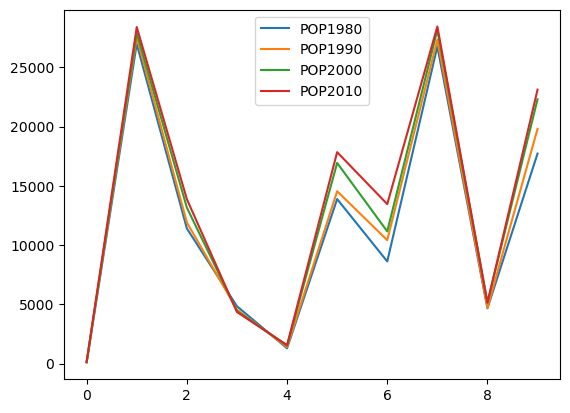

In [49]:
# basic plot

simp_db.plot();

In [50]:
# transpose

simp_db.T

,0,1,2,3,4,5,6,7,8,9
TOWN,MOUNT WASHINGTON,WEST SPRINGFIELD,HANOVER,AVON,GRANVILLE,PEMBROKE,UXBRIDGE,AGAWAM,HAMPDEN,EASTON
POP1980,100,26965,11403,4843,1298,13882,8621,26754,4665,17719
POP1990,135,27537,11912,4558,1403,14544,10415,27323,4709,19807
POP2000,130,27899,13164,4443,1521,16927,11156,28144,5171,22299
POP2010,167,28391,13879,4356,1566,17837,13457,28438,5139,23112


In [52]:
# this doesn't work!

# uncomment this next line to see how it doesn't work!
# simp_db.T.plot()

Lets try to get the town names to plot!

In [53]:
# rename columns with town names

simp_db2 = simp_db.T.rename(columns=simp_db.T.iloc[0])
simp_db2

,MOUNT WASHINGTON,WEST SPRINGFIELD,HANOVER,AVON,GRANVILLE,PEMBROKE,UXBRIDGE,AGAWAM,HAMPDEN,EASTON
TOWN,MOUNT WASHINGTON,WEST SPRINGFIELD,HANOVER,AVON,GRANVILLE,PEMBROKE,UXBRIDGE,AGAWAM,HAMPDEN,EASTON
POP1980,100,26965,11403,4843,1298,13882,8621,26754,4665,17719
POP1990,135,27537,11912,4558,1403,14544,10415,27323,4709,19807
POP2000,130,27899,13164,4443,1521,16927,11156,28144,5171,22299
POP2010,167,28391,13879,4356,1566,17837,13457,28438,5139,23112


In [54]:
# now drop town column

simp_db3 = simp_db2.drop(['TOWN'])

Now we have town names on our plot. Perhaps, a different chart type would work better though!

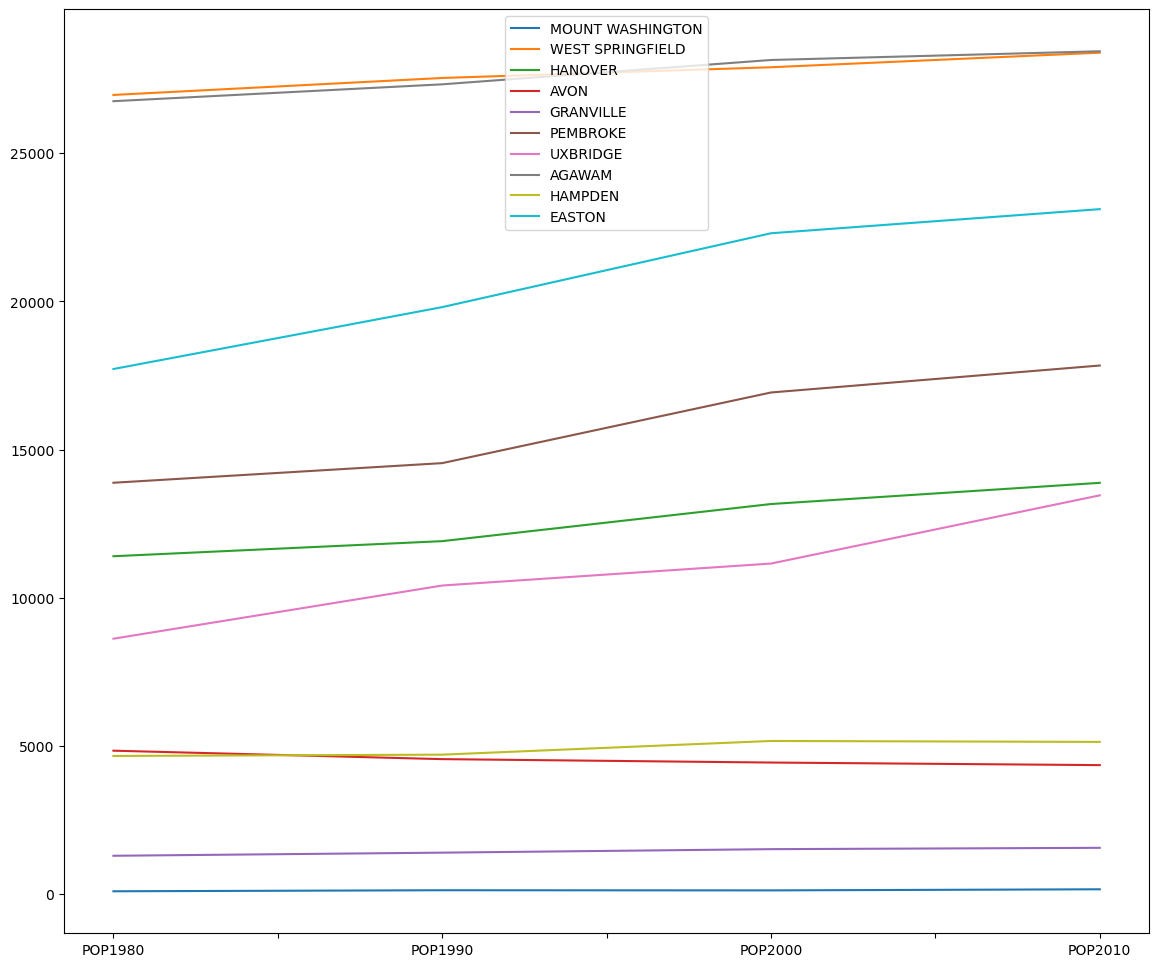

In [55]:
# plot

simp_db3.plot(figsize=(14,12));

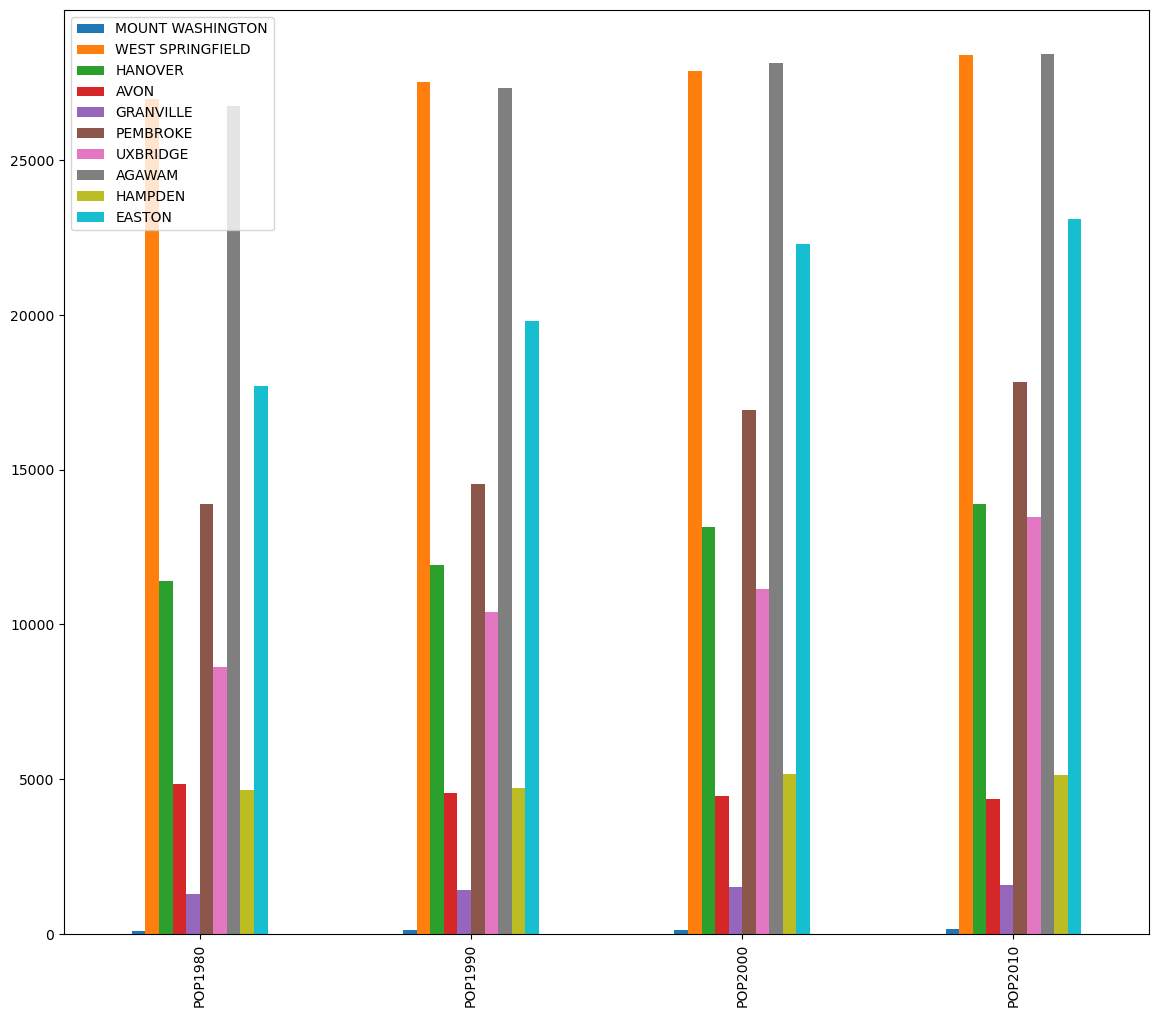

In [56]:
# bar plot

simp_db3.plot(kind='bar',figsize=(14,12));

<a id='geodf_intro'></a>
## Introducing the GeoDataFrame

So far we have been working with Pandas' `DataFrame`. Geopandas' <b>`GeoDataFrame`</b> extends the `DataFrame` with very useful spatial functions.

Just as a reminder, we have been working with a `DataFrame`.

In [57]:
# a DataFrame

type(towns_table)

pandas.core.frame.DataFrame

In [58]:
# start of table

towns_table.head()

,TOWN_ID,TOWN,FIPS_STCO,CCD_MCD,FIPS_PLACE,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,FOURCOLOR,TYPE,POP2010,POPCH00_10,SHAPE_AREA,SHAPE_LEN,geometry
0,195,MOUNT WASHINGTON,25003,080,43300,100,135,130,35,-5,1,T,167,37,5.797118e+07,31638.316048,"POLYGON ((36115.894 880179.251, 36980.214 8796..."
1,325,WEST SPRINGFIELD,25013,110,76030,26965,27537,27899,572,362,2,TC,28391,492,4.531454e+07,34458.401293,"POLYGON ((106810.684 879681.441, 106814.824 87..."
2,122,HANOVER,25023,040,28285,11403,11912,13164,509,1252,1,T,13879,715,4.059553e+07,29602.365447,"POLYGON ((250886.704 878325.941, 251695.934 87..."
3,18,AVON,25021,005,02935,4843,4558,4443,-285,-115,4,T,4356,-87,1.174804e+07,14941.830951,"POLYGON ((238434.144 876232.691, 239075.264 87..."
4,112,GRANVILLE,25013,035,26675,1298,1403,1521,105,118,4,T,1566,45,1.115403e+08,43612.600436,"POLYGON ((77501.874 877293.751, 83945.044 8759..."


We can easily convert the `DataFrame` to a `GeoDataFrame`:

In [59]:
# convert to GeoDataFrame

towns_gdb = gpd.GeoDataFrame(towns_table, geometry='geometry')

Do you notice anything different in the table?

In [60]:
# start of GeoDataFrame

towns_gdb.head()

,TOWN_ID,TOWN,FIPS_STCO,CCD_MCD,FIPS_PLACE,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,FOURCOLOR,TYPE,POP2010,POPCH00_10,SHAPE_AREA,SHAPE_LEN,geometry
0,195,MOUNT WASHINGTON,25003,080,43300,100,135,130,35,-5,1,T,167,37,5.797118e+07,31638.316048,"POLYGON ((36115.894 880179.251, 36980.214 8796..."
1,325,WEST SPRINGFIELD,25013,110,76030,26965,27537,27899,572,362,2,TC,28391,492,4.531454e+07,34458.401293,"POLYGON ((106810.684 879681.441, 106814.824 87..."
2,122,HANOVER,25023,040,28285,11403,11912,13164,509,1252,1,T,13879,715,4.059553e+07,29602.365447,"POLYGON ((250886.704 878325.941, 251695.934 87..."
3,18,AVON,25021,005,02935,4843,4558,4443,-285,-115,4,T,4356,-87,1.174804e+07,14941.830951,"POLYGON ((238434.144 876232.691, 239075.264 87..."
4,112,GRANVILLE,25013,035,26675,1298,1403,1521,105,118,4,T,1566,45,1.115403e+08,43612.600436,"POLYGON ((77501.874 877293.751, 83945.044 8759..."


Not much, but the type is different:

In [61]:
# a GeoDataFrame

type(towns_gdb)

geopandas.geodataframe.GeoDataFrame

What is so cool about a <b>`GeoDataFrame`</b>?  For one thing, normal `DataFrame` data  operations all still apply. However, simple plotting produces entirely different results!

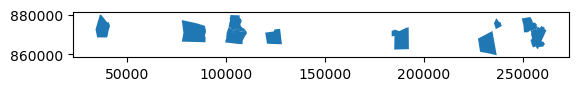

In [62]:
# plot GeoDataFrame

towns_gdb.plot();

You can create a `GeoDataFrame` directly from a file:

In [65]:
# create GeoDataFrame from file

chicago_gdf = gpd.GeoDataFrame.from_file('./data/Chicago_Community.geojson')

And plot it:

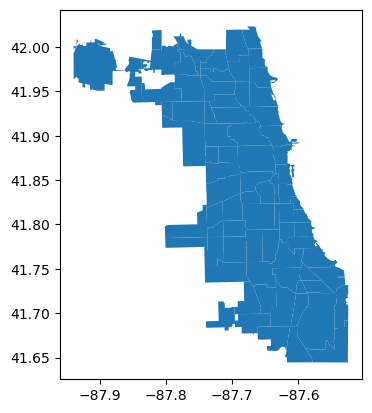

In [66]:
# plot GeoDataFrame

chicago_gdf.plot();

And start to make more detailed plots, like these below:

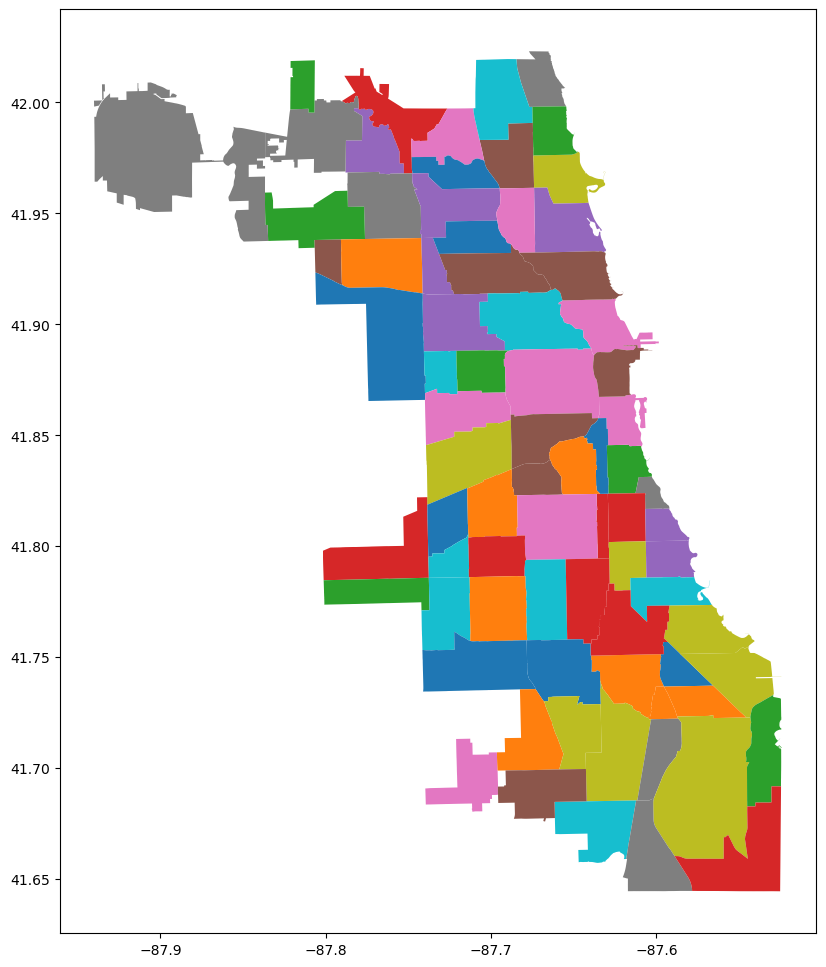

In [67]:
# plot GeoDataFrame column

chicago_gdf.plot(column='community', figsize=(14,12));

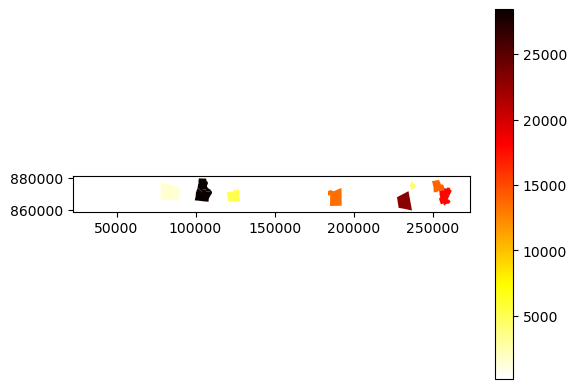

In [68]:
# plot GeoDataFrame

towns_gdb.plot(column='POP2010', cmap='hot_r', legend=True);

<a id='hex_geo'></a>
### Hex Values in the Geography Column

Sometimes when you import geospatial data the geometry values may look a little off, like long strings of numbers and letters. If this is the case, it is likely <b>hex-encoded</b>.

In [69]:
# example of hex encoded geometry
import binascii

hex_geo = binascii.hexlify(towns_gdb.loc[0, 'geometry'].wkb)
hex_geo

#hex_geo = towns_gdb.loc[0, 'geometry'].wkb.encode('hex')
#hex_geo

b'01030000000100000013000000009c699d7ca2e140a032708066dc2a410040dada860ee24080d6e03d60d82a4100b017e5d529e340a0327000fcc12a4100ec21bc0178e340c0e0b7e1d6bb2a410040dada5ec9e3408084281f6dbe2a41009092f9e31ee440a032700015af2a4100740d0ecac2e3408084289f109c2a4100187e4b1478e340a032700079842a410040dada4e6ae3408084281f6f822a4100d09cd0cf61e3408084281f22812a410088bb555360e340c0e0b7e122812a4100340337d655e140c0e0b7613d812a41009c699dc4f0e040a032708042812a41002055efd4d8e04080d6e03d95882a4100d87374a888e0408084289f1ca12a4100605fc650e9e0408084289f5db52a41002c2c93f527e140c0e0b7e1b5c22a41002c2c93c52fe14080d6e03d45c42a41009c699d7ca2e140a032708066dc2a41'

If that is the case, you can use <b>Shapely</b>'s `wkb.loads` function to convert it to something more readable (and workable). 

In [70]:
# convert hex to polygon

non_hex_geo = shapely.wkb.loads(hex_geo.decode("ascii"), hex=True)

In [71]:
# look at polygon string 

str(non_hex_geo)

'POLYGON ((36115.89421539754 880179.2508560009, 36980.214215397835 879664.120856002, 39246.68421539664 876798.0008560009, 39872.05421539396 876011.4408560023, 40522.964215397835 876342.5608559996, 41207.12421539426 874378.5008560009, 40470.314215399325 871944.3108559996, 39872.63421539962 868924.5008560009, 39762.464215397835 868663.5608559996, 39694.49421539903 868497.0608559996, 39682.60421539843 868497.4408560023, 35502.69421539456 868510.6908560023, 34694.14421539754 868513.2508560009, 34502.65421539545 869450.620856002, 33861.264215394855 872590.3108559996, 34634.52421540022 875182.8108559996, 35135.67421539873 876890.9408560023, 35198.17421539873 877090.620856002, 36115.89421539754 880179.2508560009))'

In [72]:
# see polygon type

type(non_hex_geo)

shapely.geometry.polygon.Polygon

This provides a nice opportunity to introduce <b>Shapely</b>!

<a id='shapely_intro'></a>
## Introducing Shapely

<b>Shapely</b> is a really helpful library for working with geometries. You can use it both for simple geometric operations and working with complicated real-world geometries.

<a id='basic_shapes'></a>
### Basic Shapes

Some useful shapes are `Point`s, `Line`s, and `Polygon`s. You can combine them into `MultiPoint`s, `MultiLineString`s, and `MultiPolygon`s. Here are a few examples of creating and viewing basic shapes:

In [73]:
# create point

sh_point = shapely.geometry.Point(0, 1)

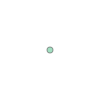

In [74]:
# view point

sh_point

In [75]:
# view object type

type(sh_point)

shapely.geometry.point.Point

In [76]:
# create line

sh_line = shapely.geometry.LineString([(0, 0), (1, 1)])

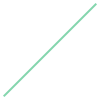

In [77]:
# view line

sh_line

In [78]:
# view object type

type(sh_line)

shapely.geometry.linestring.LineString

In [79]:
# create polygons

sh_polygon1 = shapely.geometry.Polygon([(0, 0), (1, 1), (1, 0)])
sh_polygon2 = shapely.geometry.Polygon([(2, 2), (3, 3), (3, 2), (2.75, 2.25)])

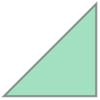

In [80]:
# view polygon

sh_polygon1

In [81]:
# view object type

type(sh_polygon1)

shapely.geometry.polygon.Polygon

In [82]:
# create multipolygons

sh_polygons = shapely.geometry.MultiPolygon([sh_polygon1, sh_polygon2])

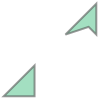

In [83]:
# view multipolygons

sh_polygons

In [84]:
# view object type

type(sh_polygons)

shapely.geometry.multipolygon.MultiPolygon

Note that the length is two - there are two polygons!

In [90]:
# view length

len(sh_polygons)

/tmp/ipykernel_111/1901879151.py:3: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(sh_polygons)


2

Well Known Text, or <b>`wkt`</b> is a human-readable way to represent geometry.

In [91]:
# view text

sh_polygons.wkt

'MULTIPOLYGON (((0 0, 1 1, 1 0, 0 0)), ((2 2, 3 3, 3 2, 2.75 2.25, 2 2)))'

<a id='geom_ops'></a>
### Geometric Attributes and Methods

Once you have constructed your shapes, there are a variety of attributes you can look up or methods you can use on the geometric objects. Here are a few examples:

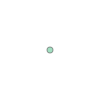

In [92]:
# find centroid

sh_polygons.centroid

In [93]:
# find centroid text

sh_polygons.centroid.wkt

'POINT (1.5357142857142858 1.2261904761904763)'

In [94]:
# find area

sh_polygons.area

0.875

In [95]:
# find length

sh_polygons.length

6.972549930381559

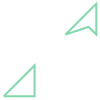

In [96]:
# find boundary

sh_polygons.boundary

In [97]:
# find bounds

sh_polygons.bounds

(0.0, 0.0, 3.0, 3.0)

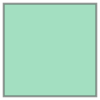

In [98]:
# find envelope

sh_polygons.envelope

A polygon is created from a <b>set of rings</b> representing <b>interior</b> and <b>exterior</b> coordinates.

In [99]:
# create polygon with hole

sh_polygon3 = shapely.geometry.Polygon([(0, 0), (0, 1), (1, 1), (1, 0)], 
                                       [[(0.25, 0.25), (0.75, 0.25), (0.75, 0.75)],
                                       [(0.25, 0.5), (0.25, 0.75), (0.5, 0.75)]])

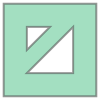

In [100]:
# view polygon

sh_polygon3

In [101]:
# view exterior coordinates

list(sh_polygon3.exterior.coords)

[(0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]

In [102]:
# view interior coordinates

for inter in list(sh_polygon3.interiors):
    print (inter.bounds)

(0.25, 0.25, 0.75, 0.75)
(0.25, 0.5, 0.5, 0.75)


You can also <b>simplify</b> geometry:

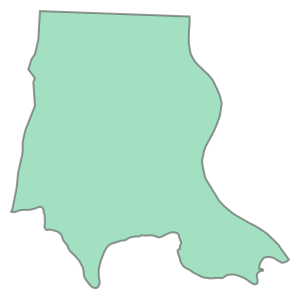

In [103]:
# select complex geometry

or_geo = towns_gdb.loc[1, 'geometry']
or_geo

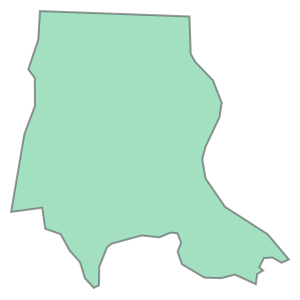

In [104]:
# simplify geometry

or_geo.simplify(50)

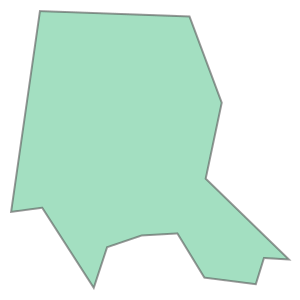

In [105]:
# simplify geometry further

or_geo.simplify(500)

<a id='spat_relat'></a>
## Exploring Spatial Relationships with Shapely

(Materials adapted from https://github.com/jorisvandenbossche/geopandas-tutorial)

<b>Spatial relationships</b> describe how two spatial objects relate to each other (e.g. overlap, intersect, contain...).

The topological, set-theoretic relationships in GIS are typically based on the DE-9IM model. See https://en.wikipedia.org/wiki/Spatial_relation for more information.

Here are some spatial relations illustrated:
![Krauss, CC BY-SA 3.0](https://upload.wikimedia.org/wikipedia/commons/5/55/TopologicSpatialRelarions2.png?1551891285514)

Lets explore these with <b>Shapely</b>!

We'll first set up some places and then see how their geometries interact.

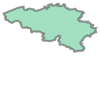

In [106]:
# retrieve Belgium geometry from countries database

belgium = countries.loc[countries['NAME'] == 'Belgium', 'geometry'].unary_union
belgium

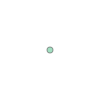

In [107]:
# retrieve Paris geometry from cities database

paris = cities.loc[cities['NAME'] == 'Paris', 'geometry'].unary_union
paris

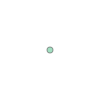

In [108]:
# retrieve Brussels geometry from cities database

brussels = cities.loc[cities['NAME'] == 'Brussels', 'geometry'].unary_union
brussels

Let's draw a line between Paris and Brussels:

In [109]:
# create line between cities

city_connect = shapely.geometry.LineString([paris, brussels])

Now we can plot everything:

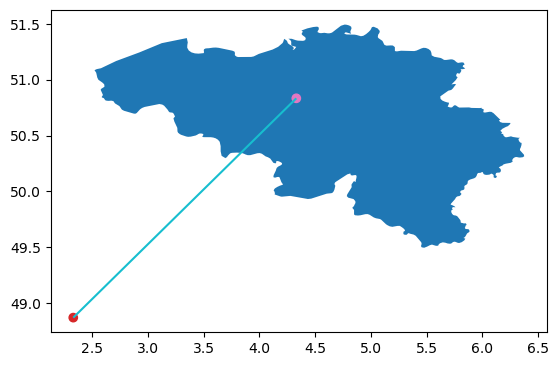

In [110]:
# plot objects

gpd.GeoSeries([belgium, paris, brussels, city_connect]).plot(cmap='tab10');

We can easily <b>test for geometric relations</b> between objects, like in these examples below:

In [111]:
# check within

brussels.within(belgium)

True

In [112]:
# check contains

belgium.contains(brussels)

True

In [113]:
# check within

paris.within(belgium)

False

In [114]:
# check contains

belgium.contains(paris)

False

Similarly, a `GeoDataFrame` (and `GeoSeries`) will also take spatial relationships:

In [115]:
# find paris in countries database

countries[countries.contains(paris)]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
22,Admin-0 country,0,2,France,FR1,1,2,Country,France,FRA,...,프랑스,Frankrijk,Francja,França,Франция,Frankrike,Fransa,Pháp,法国,"MULTIPOLYGON (((-54.11153 2.11427, -54.13491 2..."


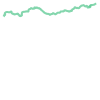

In [116]:
# select Amazon river from rivers database

amazon = rivers[rivers['name'] == 'Amazonas'].geometry.unary_union
amazon

In [117]:
# find countries that intersect Amazon river

countries[countries.intersects(amazon)]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
45,Admin-0 country,0,2,Brazil,BRA,0,2,Sovereign country,Brazil,BRA,...,브라질,Brazilië,Brazylia,Brasil,Бразилия,Brasilien,Brezilya,Brasil,巴西,"MULTIPOLYGON (((-57.61170 -30.18296, -57.56865..."
137,Admin-0 country,0,2,Colombia,COL,0,2,Sovereign country,Colombia,COL,...,콜롬비아,Colombia,Kolumbia,Colômbia,Колумбия,Colombia,Kolombiya,Colombia,哥伦比亚,"MULTIPOLYGON (((-78.82868 1.43431, -78.81286 1..."


/cvmfs/iguide.purdue.edu/software/conda/iguide/lib/python3.8/site-packages/geopandas/array.py:1486: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


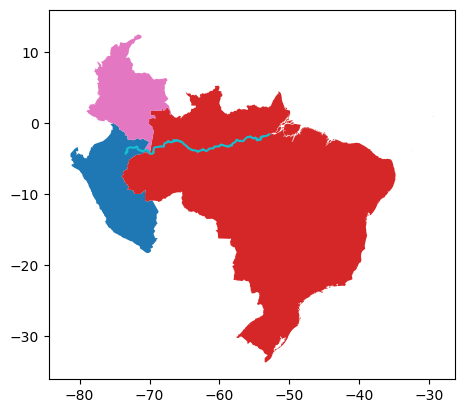

In [135]:
# map countries that intersect Amazon

pd.concat([countries[countries.intersects(amazon)]['geometry'], gpd.GeoSeries(amazon)]).plot(cmap='tab10');

Here is another example with the Danube:

/cvmfs/iguide.purdue.edu/software/conda/iguide/lib/python3.8/site-packages/geopandas/array.py:1486: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


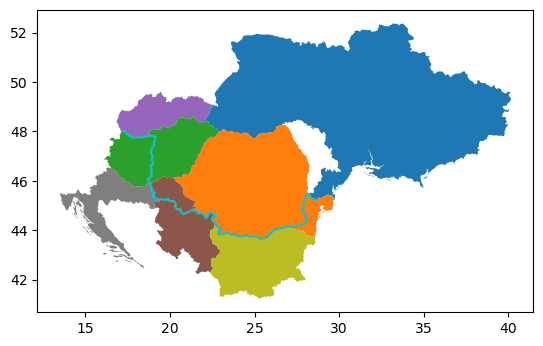

In [138]:
# find and plot countries that intersect Danube river

danube = rivers[rivers['name'] == 'Danube'].geometry.unary_union
pd.concat([countries[countries.intersects(danube)]['geometry'], gpd.GeoSeries(danube)]).plot(cmap='tab10');

<a id='spat_ops'></a>
## Performing Spatial Operations

Finally, we can perform spatial operations using Shapely. Let's look at a few examples:

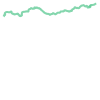

In [122]:
# view amazon river

amazon

Shapely makes it easy to create a buffer around a feature:

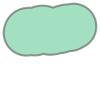

In [123]:
# create a buffer

super_amazon = amazon.buffer(10)
super_amazon

In [124]:
# select Brazil from countries database

brazil = countries[countries['NAME']=='Brazil']['geometry'].unary_union

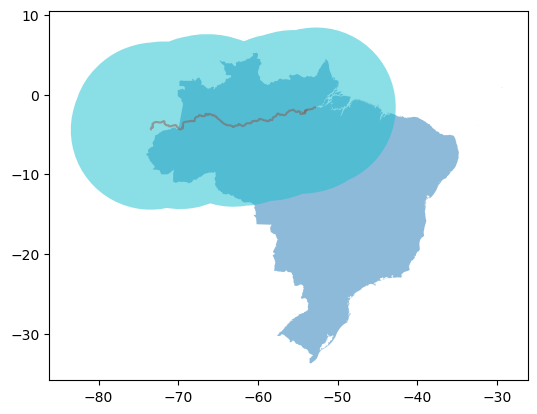

In [125]:
# plot Brazil, the Amazon river, and the buffer

gpd.GeoSeries([brazil, amazon, super_amazon]).plot(alpha=0.5, cmap='tab10');

Now we can view spatial relations between these polygons:

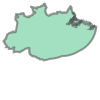

In [126]:
# intersects

super_amazon.intersection(brazil)

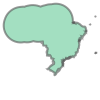

In [127]:
# union

super_amazon.union(brazil)

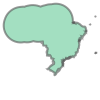

In [128]:
# union

brazil.union(super_amazon)

Note that for some spatial relations, the order in which they are called matters.

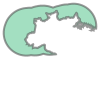

In [129]:
# difference

super_amazon.difference(brazil)

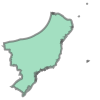

In [130]:
# difference

brazil.difference(super_amazon)

Lets end with a few more examples.

In [131]:
# find countries in South America

countries[countries['CONTINENT'] == 'South America']

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
5,Admin-0 country,0,2,Argentina,ARG,0,2,Sovereign country,Argentina,ARG,...,아르헨티나,Argentinië,Argentyna,Argentina,Аргентина,Argentina,Arjantin,Argentina,阿根廷,"MULTIPOLYGON (((-67.28475 -23.83414, -67.25133..."
23,Admin-0 country,0,4,Suriname,SUR,0,2,Sovereign country,Suriname,SUR,...,수리남,Suriname,Surinam,Suriname,Суринам,Surinam,Surinam,Suriname,蘇利南,"POLYGON ((-54.08080 3.30931, -54.11429 3.28538..."
24,Admin-0 country,0,4,Guyana,GUY,0,2,Sovereign country,Guyana,GUY,...,가이아나,Guyana,Gujana,Guiana,Гайана,Guyana,Guyana,Guyana,圭亚那,"MULTIPOLYGON (((-56.48182 1.94161, -56.52851 1..."
45,Admin-0 country,0,2,Brazil,BRA,0,2,Sovereign country,Brazil,BRA,...,브라질,Brazilië,Brazylia,Brasil,Бразилия,Brasilien,Brezilya,Brasil,巴西,"MULTIPOLYGON (((-57.61170 -30.18296, -57.56865..."
46,Admin-0 country,0,4,Uruguay,URY,0,2,Sovereign country,Uruguay,URY,...,우루과이,Uruguay,Urugwaj,Uruguai,Уругвай,Uruguay,Uruguay,Uruguay,乌拉圭,"POLYGON ((-53.37909 -33.74068, -53.39635 -33.7..."
136,Admin-0 country,0,3,Ecuador,ECU,0,2,Sovereign country,Ecuador,ECU,...,에콰도르,Ecuador,Ekwador,Equador,Эквадор,Ecuador,Ekvador,Ecuador,厄瓜多尔,"MULTIPOLYGON (((-78.82868 1.43431, -78.76997 1..."
137,Admin-0 country,0,2,Colombia,COL,0,2,Sovereign country,Colombia,COL,...,콜롬비아,Colombia,Kolumbia,Colômbia,Колумбия,Colombia,Kolombiya,Colombia,哥伦比亚,"MULTIPOLYGON (((-78.82868 1.43431, -78.81286 1..."


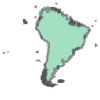

In [132]:
# find geometry for countries 

countries[countries['CONTINENT'] == 'South America'].unary_union

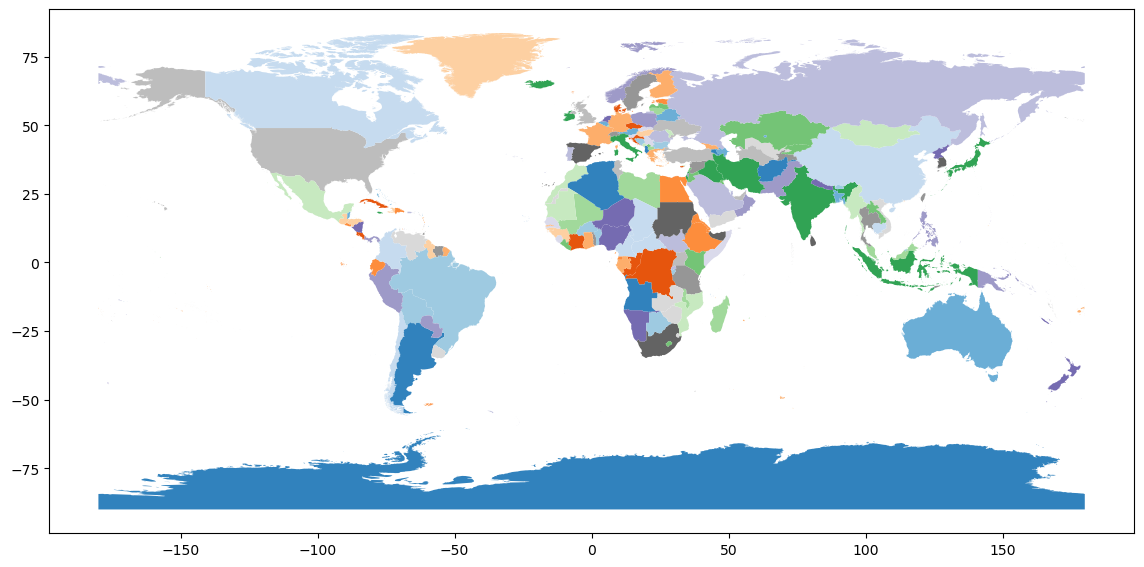

In [133]:
# plot all countries

countries.plot(column='NAME', cmap='tab20c', figsize=(14,14), categorical=True);

Now go forth and explore!